In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import jieba
%matplotlib inline


In [13]:
# order_id	自增字段
# crawl	数据采集时间
# url	数据源链接
# hotel_name	民宿名字
# post_time	顾客评论发布时间
# user_level	用户等级
# user_name	用户名字
# content	用户评价内容
# user_score	用户评分
df=pd.read_csv('https://labfile.oss.aliyuncs.com/courses/2628/1-1.csv')
df.shape
df.head()

,order_id,crawl_datetime,url,hotel_name,post_time,user_level,user_name,content,user_score
0,1,2018-03-27 16:26:17,http://hotels.ctrip.com/hotel/dianping/1490366...,武隆强兴客栈,发表于2018-01-05,level_new,M***1,真的不错，看到这个评论有些人说不怎么好，个人有点小洁癖，害怕卫生不干净，但是去了之后，发现房...,5.0
1,2,2018-03-27 16:26:17,http://hotels.ctrip.com/hotel/dianping/1490366...,武隆强兴客栈,发表于2017-09-30,level_new,M***6,第一次到武隆玩，觉得酒店卫生各方面还行，服务态度好，吃饭方便楼下特色小吃也很多，老板娘还亲自...,4.5
2,3,2018-03-27 16:26:17,http://hotels.ctrip.com/hotel/dianping/1490366...,武隆强兴客栈,发表于2017-08-15,level_new,_***1,要去武隆天生三桥，晚上坐火车到了。如果想旅途开心，还是不要住这里了。第一，床单上黄的、黑的，...,1.0
3,4,2018-03-27 16:26:17,http://hotels.ctrip.com/hotel/dianping/1490366...,武隆强兴客栈,发表于2017-05-07,level_daren,阿龙,怎么说呢？这家酒店离车站很近，比较方便，我们是在五一前订的，价格才88，不知道是不是比较便宜...,3.0
4,5,2018-03-27 16:26:17,http://hotels.ctrip.com/hotel/dianping/1490366...,武隆强兴客栈,发表于2017-04-01,level_new,M***4,老板人很好，为了方便我们停车还特地给我们占着停车位。感觉还是挺干净的，被子上折痕还在，应该是...,3.5


In [7]:
#除了自增字段 order_id，其余不能进行数据描述
df.describe()

,order_id
count,5677.00000
mean,2839.00000
std,1638.95307
min,1.00000
25%,1420.00000
50%,2839.00000
75%,4258.00000
max,5677.00000


In [8]:
df.info()
#用户打分列表的数据出现异常，里面出现了脏数据

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5677 entries, 0 to 5676
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        5677 non-null   int64 
 1   crawl_datetime  5677 non-null   object
 2   url             5677 non-null   object
 3   hotel_name      5677 non-null   object
 4   post_time       5677 non-null   object
 5   user_level      3352 non-null   object
 6   user_name       5677 non-null   object
 7   content         5677 non-null   object
 8   user_score      5677 non-null   object
dtypes: int64(1), object(8)
memory usage: 399.3+ KB


In [9]:
#针对用户打分出现的问题进行处理，首先打印用户打分的去重数据
#发现用户打分出现了字符型数据，需要进行清理
df['user_score'].unique()

array(['5.0', '4.5', '1.0', '3.0', '3.5', '4.8', '4.0', '4.3', '信息不存在',
       '2.8', '3.3', '3.8', '2.0', '2.3', '1.8', '2.5', '1.3', '1.5'],
      dtype=object)

In [11]:
#复制一个pandas的处理副本
df_clean=df[df.user_score != '信息不存在'].copy()
#数据检查
df_clean['user_score'].unique()

array(['5.0', '4.5', '1.0', '3.0', '3.5', '4.8', '4.0', '4.3', '2.8',
       '3.3', '3.8', '2.0', '2.3', '1.8', '2.5', '1.3', '1.5'],
      dtype=object)

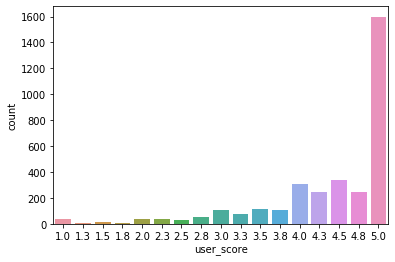

In [14]:
#对清理之后的用户打分进行可视化
sns.countplot(data=df_clean,x='user_score')
plt.show()
#发现大部分的用户打分在 4 分以上，原始用户打分整体呈现满意趋势。

In [16]:
#为了和模型打分能进行一致性评价，我们对用户打分数据进行归一化操作
df_clean['user_score_normal']=df_clean['user_score'].apply(
                                lambda x: round(float(x)/5,3))
df_clean.head(5)

,order_id,crawl_datetime,url,hotel_name,post_time,user_level,user_name,content,user_score,user_score_normal
0,1,2018-03-27 16:26:17,http://hotels.ctrip.com/hotel/dianping/1490366...,武隆强兴客栈,发表于2018-01-05,level_new,M***1,真的不错，看到这个评论有些人说不怎么好，个人有点小洁癖，害怕卫生不干净，但是去了之后，发现房...,5.0,1.0
1,2,2018-03-27 16:26:17,http://hotels.ctrip.com/hotel/dianping/1490366...,武隆强兴客栈,发表于2017-09-30,level_new,M***6,第一次到武隆玩，觉得酒店卫生各方面还行，服务态度好，吃饭方便楼下特色小吃也很多，老板娘还亲自...,4.5,0.9
2,3,2018-03-27 16:26:17,http://hotels.ctrip.com/hotel/dianping/1490366...,武隆强兴客栈,发表于2017-08-15,level_new,_***1,要去武隆天生三桥，晚上坐火车到了。如果想旅途开心，还是不要住这里了。第一，床单上黄的、黑的，...,1.0,0.2
3,4,2018-03-27 16:26:17,http://hotels.ctrip.com/hotel/dianping/1490366...,武隆强兴客栈,发表于2017-05-07,level_daren,阿龙,怎么说呢？这家酒店离车站很近，比较方便，我们是在五一前订的，价格才88，不知道是不是比较便宜...,3.0,0.6
4,5,2018-03-27 16:26:17,http://hotels.ctrip.com/hotel/dianping/1490366...,武隆强兴客栈,发表于2017-04-01,level_new,M***4,老板人很好，为了方便我们停车还特地给我们占着停车位。感觉还是挺干净的，被子上折痕还在，应该是...,3.5,0.7


In [21]:
#假设用户打分和用户情感极性一致，满足用户评论情感建模需求，
#可以对用户高于 3 分的评价标注为 1，否则为 0
df_clean['label']=df_clean['user_score'].apply(
                    lambda x: 1 if float(x)>3 else  0)
df_clean['label'].unique()

array([1, 0], dtype=int64)

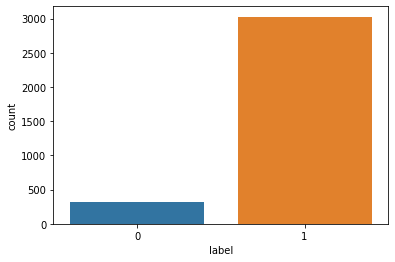

In [22]:
# 查看标签的分布情况
sns.countplot(data=df_clean,x='label')
plt.show()

In [25]:
# 加载用户评论向量化模块
from sklearn.feature_extraction.text import CountVectorizer
# 对测试集和训练集进行划分
from sklearn.model_selection import train_test_split

In [26]:
''.join(jieba.lcut(str('使用分詞器進行分詞')))

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\user\AppData\Local\Temp\jieba.cache
Loading model cost 0.856 seconds.
Prefix dict has been built successfully.


'使用分詞器進行分詞'

In [41]:
#批量对用户评价进行分词 
df_clean['text_cut']=df_clean['content'].apply(
                      lambda x : "".join(jieba.lcut(str(x))))
df_clean.head()

,order_id,crawl_datetime,url,hotel_name,post_time,user_level,user_name,content,user_score,user_score_normal,label,text_cut
0,1,2018-03-27 16:26:17,http://hotels.ctrip.com/hotel/dianping/1490366...,武隆强兴客栈,发表于2018-01-05,level_new,M***1,真的不错，看到这个评论有些人说不怎么好，个人有点小洁癖，害怕卫生不干净，但是去了之后，发现房...,5.0,1.0,1,真的不错，看到这个评论有些人说不怎么好，个人有点小洁癖，害怕卫生不干净，但是去了之后，发现房...
1,2,2018-03-27 16:26:17,http://hotels.ctrip.com/hotel/dianping/1490366...,武隆强兴客栈,发表于2017-09-30,level_new,M***6,第一次到武隆玩，觉得酒店卫生各方面还行，服务态度好，吃饭方便楼下特色小吃也很多，老板娘还亲自...,4.5,0.9,1,第一次到武隆玩，觉得酒店卫生各方面还行，服务态度好，吃饭方便楼下特色小吃也很多，老板娘还亲自...
2,3,2018-03-27 16:26:17,http://hotels.ctrip.com/hotel/dianping/1490366...,武隆强兴客栈,发表于2017-08-15,level_new,_***1,要去武隆天生三桥，晚上坐火车到了。如果想旅途开心，还是不要住这里了。第一，床单上黄的、黑的，...,1.0,0.2,0,要去武隆天生三桥，晚上坐火车到了。如果想旅途开心，还是不要住这里了。第一，床单上黄的、黑的，...
3,4,2018-03-27 16:26:17,http://hotels.ctrip.com/hotel/dianping/1490366...,武隆强兴客栈,发表于2017-05-07,level_daren,阿龙,怎么说呢？这家酒店离车站很近，比较方便，我们是在五一前订的，价格才88，不知道是不是比较便宜...,3.0,0.6,0,怎么说呢？这家酒店离车站很近，比较方便，我们是在五一前订的，价格才88，不知道是不是比较便宜...
4,5,2018-03-27 16:26:17,http://hotels.ctrip.com/hotel/dianping/1490366...,武隆强兴客栈,发表于2017-04-01,level_new,M***4,老板人很好，为了方便我们停车还特地给我们占着停车位。感觉还是挺干净的，被子上折痕还在，应该是...,3.5,0.7,1,老板人很好，为了方便我们停车还特地给我们占着停车位。感觉还是挺干净的，被子上折痕还在，应该是...


In [42]:
#用户评论向量化
#用户评论向量化的目的就是将用户评论转化为计算机可以处理的数字信息
#通过建立向量化词典对用户评论进行向量化

#调整低词频带来的影响
vectorizer=CountVectorizer(token_pattern='\[?\w+\]?',max_features=5000)
vectorizer.fit_transform(df_clean['text_cut'])

<3352x5000 sparse matrix of type '<class 'numpy.int64'>'
	with 12550 stored elements in Compressed Sparse Row format>

In [43]:
#查看词典中的词频信息
vectorizer.vocabulary_

{'真的不错': 2823,
 '老板人特别好': 3348,
 '然后本来空调另收费的': 2695,
 '说不收我们的费用': 3854,
 '觉得很好而且才几十一晚上': 3767,
 '性价比高': 1337,
 '然后进门左边第一个就是2栋': 2701,
 '第一次到武隆玩': 3092,
 '觉得酒店卫生各方面还行': 3774,
 '服务态度好': 2143,
 '要去武隆天生三桥': 3745,
 '晚上坐火车到了': 1809,
 '还是不要住这里了': 4114,
 '第一': 3083,
 '被套上也有黑点像霉': 3666,
 '第二': 3098,
 '注意': 2581,
 '要么就是冷水冷死你': 3734,
 '答案是温和三秒': 3130,
 '重新开热水': 4681,
 '第三': 3096,
 '怎么说呢': 1320,
 '比较方便': 2401,
 '老板不是很热情': 3319,
 '被子有点湿': 3676,
 '房间不大': 1444,
 '老板人很好': 3342,
 '被子上折痕还在': 3671,
 '武隆很多这种公寓': 2329,
 '睡眠不好的小伙伴还是不要在武隆区中心住了': 2845,
 '酒店式的公寓': 4492,
 '环境不错': 2745,
 '房子很干净': 1436,
 '老板很好': 3440,
 '态度很好': 1316,
 '很不错': 1248,
 '至少房间卫生比较干净整洁': 3576,
 '离汽车站只隔了一幢房子': 2946,
 '楼下吃饭也很方便': 2280,
 '每次来武隆都住这儿': 2357,
 '干净整洁': 1175,
 '卫生不错': 590,
 '老板人好': 3340,
 '有啥问题找他都会帮忙': 1970,
 '环境还行': 2780,
 '还行吧': 4225,
 '房间小了点': 1483,
 '晚上安静': 1813,
 '老板夫妻人都黑好': 3366,
 '房间也干净': 1452,
 '配置非常不错': 4356,
 '性价比超高': 1332,
 '还可以': 4067,
 '价格偏高': 274,
 '房间很干净': 1501,
 '晚上很安静': 1819,
 '离火车站很近': 3012,
 '走路5': 3919,
 '楼下有

In [44]:
#数据集合划分
#按照训练集 8 成和测试集 2 成的比例对数据集进行划分，并检查划分之后的数据集数量
x_train_,y_train_,x_test,y_test=train_test_split(
                    df_clean['text_cut'],df_clean['label'],test_size=0.2,random_state=1)
for data_set in [x_train,y_train,x_test,y_test]:
    print(data_set.shape)

(2681, 5000)
(671, 5000)
(2681,)
(671,)


In [45]:
x_train=vectorizer.transform(x_train_)
y_train=vectorizer.transform(y_train_)
for data_set in [x_train,y_train,x_test,y_test]:
    print(data_set.shape)

(2681, 5000)
(671, 5000)
(2681,)
(671,)


In [46]:
# 模型加载贝叶斯分类模型
from sklearn.naive_bayes import MultinomialNB
own_model=MultinomialNB()

In [47]:
#模型訓練
%time own_model.fit(x_train,x_test)
own_model_result=own_model.predict(y_train)

Wall time: 2 ms


In [62]:
from sklearn import metrics
print(metrics.classification_report(y_test,own_model_result))
#acc 评价被正确预测的样本占总样本的比例
#Precision 是衡量模型精确率的指标，它是指模型识别出的文档数与识别的文档总数的比率，衡量的是模型的查准率
#Recall 召回率也称为敏感度，它是指模型识别出的相关文档数和文档库中所有的相关文档数的比率，衡量的是检索系统的查全率，表示正样本在被正确划分样本中所占的比例
#F 值是精确率与召回率的调和平均数

              precision    recall  f1-score   support

           0       0.51      0.55      0.53        73
           1       0.94      0.93      0.94       598

    accuracy                           0.89       671
   macro avg       0.73      0.74      0.73       671
weighted avg       0.90      0.89      0.89       671



In [63]:
predict_text=['这个民宿环境不错啊','这家民宿环境真的乐色']
test_text=vectorizer.transform(
    [''.join(jieba.lcut(i)) for i in predict_text])
test_pro=own_model.predict_proba(test_text)

# 直接输出用户评论对应的积极情感对应的概率值作为用户情感极性映射
[i[1] for i in test_pro]

[0.9060052219321149, 0.9060052219321149]

In [64]:
#使用训练好的模型对用户评论进行情感极性预测，并输出情感为积极的概率来表示用户评论的情感趋势
data_text=vectorizer.transform(df_clean['text_cut'])
%time df_clean['sa_model_score']=[round(i[1],5) for i in own_model.predict_proba(data_text)]

Wall time: 21 ms


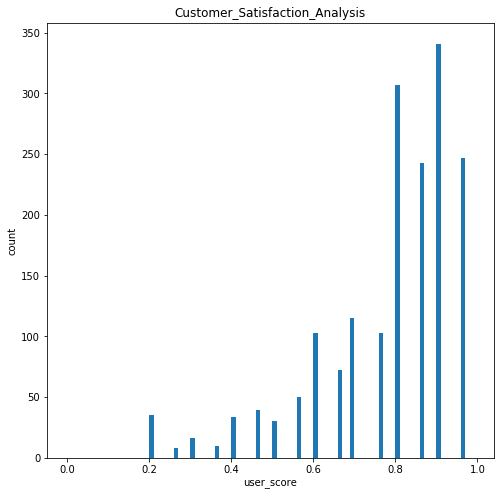

In [65]:
model_score=df_clean['sa_model_score']
user_score=df_clean['user_score_normal']
#定义画布大小
plt.rcParams['figure.figsize']=(8.0,8.0)
plt.hist(user_score,bins=np.arange(0,1,0.01))
plt.xlabel('user_score')
plt.ylabel('count')
plt.title('Customer_Satisfaction_Analysis')
plt.show()

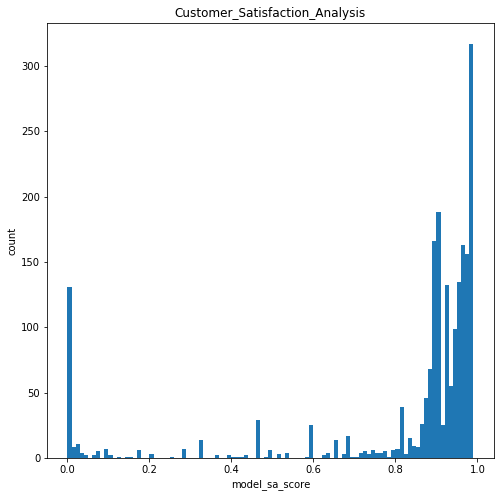

In [66]:
#对模型依据用户评价进行建模而预测出来的用户满意度进行可视化
plt.hist(model_score,bins=np.arange(0,1,0.01))
plt.xlabel("model_sa_score")
plt.ylabel('count')
plt.title('Customer_Satisfaction_Analysis')
plt.show()

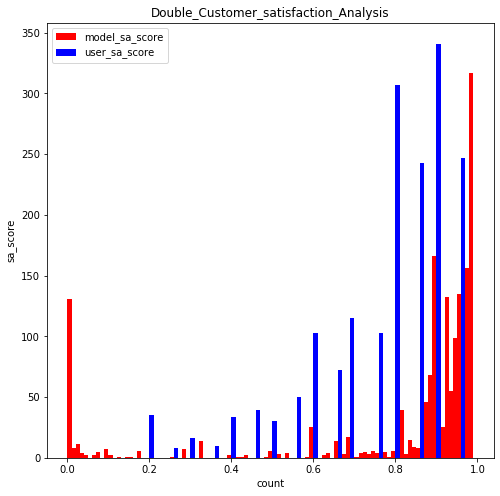

In [67]:
# 使用红色描述模型情感极性
plt.hist(model_score,bins=np.arange(0,1,0.01),color='red',label='model_sa_score')
# 使用蓝色描述用户原始打分
plt.hist(user_score,bins=np.arange(0,1,0.01),color='blue',label='user_sa_score')
plt.legend()
plt.xlabel('count')
plt.ylabel('sa_score')
plt.title('Double_Customer_satisfaction_Analysis')
plt.show()
#两种情感极性进行对比可视化

In [68]:
#挑选两列数据进行描述统计
static=df_clean[['sa_model_score','user_score_normal']]
static.describe()

,sa_model_score,user_score_normal
count,3352.000000,3352.000000
mean,0.890332,0.882375
std,0.233437,0.168432
min,0.000000,0.200000
25%,0.906010,0.800000
50%,0.979110,0.960000
75%,0.996555,1.000000
max,1.000000,1.000000


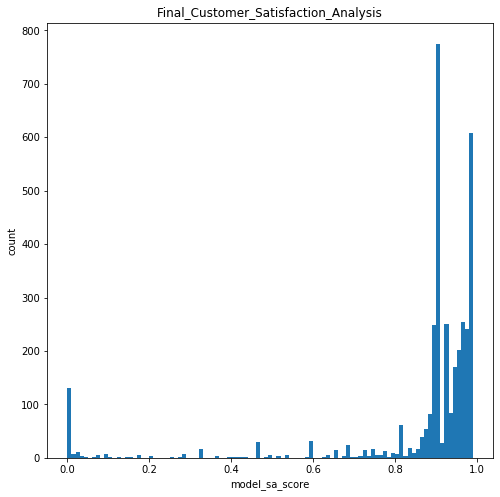

In [74]:
# 全量用户评论分词
df['text_cut']=df['content'].apply(
                lambda x: ''.join(jieba.lcut(str(x))))
# 全量用户评论向量化
data_text=vectorizer.transform(df['text_cut'])
# 全量对用户评论情感推理
df['sa_model_score']=[round(i[1],5) for i in own_model.predict_proba(data_text)]

plt.hist(df['sa_model_score'],bins=np.arange(0,1,0.01))
plt.xlabel("model_sa_score")
plt.ylabel('count')
plt.title('Final_Customer_Satisfaction_Analysis')
plt.show()

In [76]:
# 对用户情感极性进行描述统计
static=df[['sa_model_score']]
static.describe()

,sa_model_score
count,5677.000000
mean,0.913803
std,0.186008
min,0.000000
25%,0.906010
50%,0.976560
75%,0.995370
max,1.000000


In [77]:
# 最终的数据文件
df.head()

,order_id,crawl_datetime,url,hotel_name,post_time,user_level,user_name,content,user_score,test_text,test_cut,text_cut,sa_model_score
0,1,2018-03-27 16:26:17,http://hotels.ctrip.com/hotel/dianping/1490366...,武隆强兴客栈,发表于2018-01-05,level_new,M***1,真的不错，看到这个评论有些人说不怎么好，个人有点小洁癖，害怕卫生不干净，但是去了之后，发现房...,5.0,真的不错，看到这个评论有些人说不怎么好，个人有点小洁癖，害怕卫生不干净，但是去了之后，发现房...,真的不错，看到这个评论有些人说不怎么好，个人有点小洁癖，害怕卫生不干净，但是去了之后，发现房...,真的不错，看到这个评论有些人说不怎么好，个人有点小洁癖，害怕卫生不干净，但是去了之后，发现房...,0.99018
1,2,2018-03-27 16:26:17,http://hotels.ctrip.com/hotel/dianping/1490366...,武隆强兴客栈,发表于2017-09-30,level_new,M***6,第一次到武隆玩，觉得酒店卫生各方面还行，服务态度好，吃饭方便楼下特色小吃也很多，老板娘还亲自...,4.5,第一次到武隆玩，觉得酒店卫生各方面还行，服务态度好，吃饭方便楼下特色小吃也很多，老板娘还亲自...,第一次到武隆玩，觉得酒店卫生各方面还行，服务态度好，吃饭方便楼下特色小吃也很多，老板娘还亲自...,第一次到武隆玩，觉得酒店卫生各方面还行，服务态度好，吃饭方便楼下特色小吃也很多，老板娘还亲自...,0.98861
2,3,2018-03-27 16:26:17,http://hotels.ctrip.com/hotel/dianping/1490366...,武隆强兴客栈,发表于2017-08-15,level_new,_***1,要去武隆天生三桥，晚上坐火车到了。如果想旅途开心，还是不要住这里了。第一，床单上黄的、黑的，...,1.0,要去武隆天生三桥，晚上坐火车到了。如果想旅途开心，还是不要住这里了。第一，床单上黄的、黑的，...,要去武隆天生三桥，晚上坐火车到了。如果想旅途开心，还是不要住这里了。第一，床单上黄的、黑的，...,要去武隆天生三桥，晚上坐火车到了。如果想旅途开心，还是不要住这里了。第一，床单上黄的、黑的，...,0.00000
3,4,2018-03-27 16:26:17,http://hotels.ctrip.com/hotel/dianping/1490366...,武隆强兴客栈,发表于2017-05-07,level_daren,阿龙,怎么说呢？这家酒店离车站很近，比较方便，我们是在五一前订的，价格才88，不知道是不是比较便宜...,3.0,怎么说呢？这家酒店离车站很近，比较方便，我们是在五一前订的，价格才88，不知道是不是比较便宜...,怎么说呢？这家酒店离车站很近，比较方便，我们是在五一前订的，价格才88，不知道是不是比较便宜...,怎么说呢？这家酒店离车站很近，比较方便，我们是在五一前订的，价格才88，不知道是不是比较便宜...,0.86256
4,5,2018-03-27 16:26:17,http://hotels.ctrip.com/hotel/dianping/1490366...,武隆强兴客栈,发表于2017-04-01,level_new,M***4,老板人很好，为了方便我们停车还特地给我们占着停车位。感觉还是挺干净的，被子上折痕还在，应该是...,3.5,老板人很好，为了方便我们停车还特地给我们占着停车位。感觉还是挺干净的，被子上折痕还在，应该是...,老板人很好，为了方便我们停车还特地给我们占着停车位。感觉还是挺干净的，被子上折痕还在，应该是...,老板人很好，为了方便我们停车还特地给我们占着停车位。感觉还是挺干净的，被子上折痕还在，应该是...,0.88081
